# A brief introduction to particle physics 
This dataset from https://www.kaggle.com/naharrison/particle-identification-from-detector-responses/home is a simulation of electron-proton inelastic scattering measured by a particle detector system. 
In order to analyse these data is necessary to recall some concepts.
## The Standard Model
The building blocks of matter are elementary particles. These particles are divided in two major types: quarks and leptons. The Standard Model also studies the interaction of these particles through fundamental forces (strong, weak and electromagnetic).
For every type of particle there also exists a corresponding antiparticle.
### Quarks
Quarks are fundamental constituents of matter because they combine to form hadrons. There are six quarks paired in three groups: "up/down", "charm/strange" and "top/bottom". They are held together through strong forces.
#### Hadrons 
They divide in Baryons and Mesons. Baryons are made of three quarks. For example **protons** are made of (uud) quarks and  neutrons are made of (udd) quarks.
Mesons contain one quark and one antiquark. An example of a meson is a **pion** which is made of an up quark and a down antiquark. Another example of a meson is **kaon**, it is formed by a up or down quark and a anti-strange quark.
### Leptons
Leptons have a 1/2 spin and do not undergo strong interactions. There are six leptons, three of wich have an electrical charge. These are: electron, muon and tau. The three remaining are neutrinos. A **positron** is the antiparticle counterpart of an electron. It possess the same mass and spin but positive charge.

 

# Inelastic scattering
Is a process used to probe the inside structure of hadrons, in this case protons. In this process a incident particle (photoelectron) collides with a target proton. The kinetic energy of the incident particle is not conserved after the collision. During inelastic scattering a proton can break up into its constituent quarks which then form a hadronic jet. The angles of the deflection gives information about the nature of the process.

# Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving pid-5M.csv to pid-5M (3).csv


# Read dataset

In [0]:
import io
df = pd.read_csv(io.StringIO(uploaded['pid-5M.csv'].decode('utf-8'))) # pd.read_csv returns a DataFrame

# Data Visualization

In [3]:
df.head()
#The id means: positron (-11), pion (211), kaon (321), and proton (2212)
#p is momentum (GeV/c)
#theta and beta are angles (rad)
#nphe is the number of photoelectons
#ein is the inner energy (GeV)
#eout is the outer energy (GeV)

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


In [4]:
df.describe()

,id,p,theta,beta,nphe,ein,eout
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,9.941839e+02,1.230053e+00,4.889321e-01,8.995796e-01,3.575243e+00,5.635883e-02,7.033195e-02
std,9.724034e+02,7.414895e-01,2.942161e-01,1.132321e-01,1.779236e+01,7.882675e-02,1.020604e-01
min,-1.100000e+01,2.101170e-01,9.222140e-02,5.500010e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.110000e+02,6.657510e-01,2.817420e-01,8.378760e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.110000e+02,1.066150e+00,4.048670e-01,9.461940e-01,0.000000e+00,3.442440e-02,4.417490e-02
75%,2.212000e+03,1.649650e+00,6.117800e-01,9.855910e-01,0.000000e+00,6.834520e-02,9.365990e-02
max,2.212000e+03,5.286950e+00,2.219270e+00,1.499590e+00,3.490000e+02,8.993820e-01,1.097410e+00


In [5]:
df.shape #number of rows and columns

(5000000, 7)

Text(0.5,1,'Momentum Distribution')

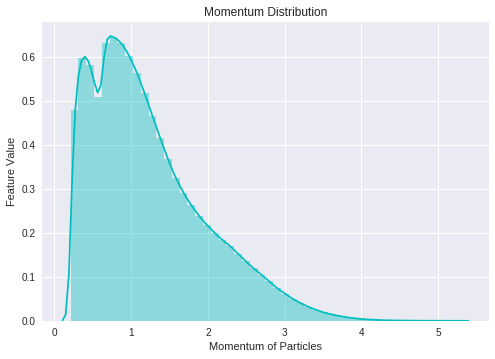

In [8]:
sns.set(style='darkgrid')
sns.distplot(df['p'], hist=True, kde=True, color='c')
plt.xlabel('Momentum of Particles')
plt.ylabel('Feature Value')
plt.title('Momentum Distribution')

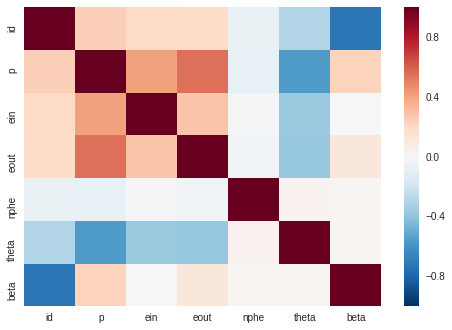

In [9]:
#correlation heat map
sns.set(style='darkgrid')
corr = df[['id', 'p','ein', 'eout','nphe', 'theta', 'beta']].corr()
sns.heatmap(corr)

Text(0,0.5,'beta angle')

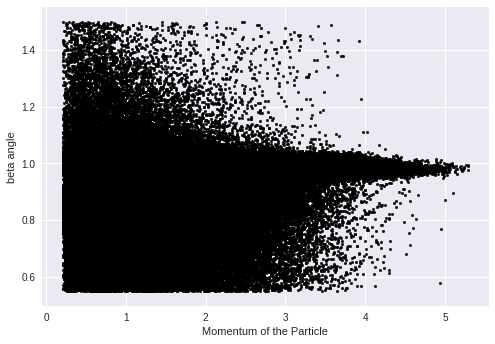

In [10]:
f1 = df['p'].values
f2 = df['beta'].values
plt.scatter(f1, f2, c='black', s=7)
plt.xlabel('Momentum of the Particle')
plt.ylabel('beta angle')


# Preprocessing
## Removing null values

In [11]:
df.isnull().sum() #there are no null values<

id       0
p        0
theta    0
beta     0
nphe     0
ein      0
eout     0
dtype: int64

## Split dataset into train and test set

In [0]:
features = df.drop('id', axis=1)
labels = df['id']

In [0]:
#test and train split using sklearn.model_selection
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.22, random_state = 1)

In [14]:
y_train.unique()

array([ 211, 2212,  321,  -11])

# Applying Models


In [0]:
from sklearn.metrics import accuracy_score

## SGDClassifier

In [16]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(x_train, y_train)
pred_sgd = clf.predict(x_test)
print('accuracy score:', accuracy_score(y_test, pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy score: 0.9303881818181818


## AdaBoostClassifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier
clf_abc = AdaBoostClassifier()
clf_abc.fit(x_train, y_train)
pred_abc = clf_abc.predict(x_test)
print('accuracy score:', accuracy_score(y_test, pred_abc))

accuracy score: 0.9382590909090909


## XGBoost


In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
pred_xgb = xgb.predict(x_test)
print('accuracy score:', accuracy_score(y_test, pred_xgb))

accuracy score: 0.9691890909090909


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier()
clf_rfc.fit(x_train, y_train)
pred_rfc = clf_rfc.predict(x_test)
print('accuracy score:', accuracy_score(y_test, pred_rfc))

accuracy score: 0.97013


## Change id names

In [0]:
y_test = y_test.map({-11: 'positorn', 211: 'pion', 321: 'kaon', 2212: 'proton'}).astype(str)
y_test.head()

1903699    proton
1139078      pion
1466517    proton
1723903      pion
4876944    proton
Name: id, dtype: object